In [1]:
!pip install pandas
!pip install numpy

In [2]:
import pandas as pd
import numpy as np

In [4]:
#Q1
df = pd.read_csv('nutrition-food.csv', encoding='UTF-16')

In [5]:
#top 5 entries
df.head(5)

,Name,Calories,Fat (g),Carb. (g),Fiber (g),Protein (g)
0,Chonga Bagel,300,5.0,50,3,12
1,8-Grain Roll,380,6.0,70,7,10
2,Almond Croissant,410,22.0,45,3,10
3,Apple Fritter,460,23.0,56,2,7
4,Banana Nut Bread,420,22.0,52,2,6


In [6]:
#bottom 5 entries
df.tail(5)

,Name,Calories,Fat (g),Carb. (g),Fiber (g),Protein (g)
108,Justin's Chocolate Hazelnut Butter,180,14.0,12,3,4
109,Justin's Classic Almond Butter,190,18.0,6,3,7
110,Lemon Chiffon Yogurt,340,13.0,38,0,18
111,Organic Avocado (Spread),90,8.0,5,4,1
112,Seasonal Fruit Blend,90,0.0,24,4,1


In [7]:
#number of rows and columns
df.shape

(113, 6)

In [8]:
#unique entries and number of unique entries in each column
i=0
for c in df.columns:
    print("Unique values in column", i, "(", df.columns[i], "): ")
    print(df[df.columns[i]].unique())
    print("Number of unique values in column", i, "(", df.columns[i], "):", df[df.columns[i]].nunique())
    print("\n")
    i= i+1

Unique values in column 0 ( Name ): 
['Chonga Bagel' '8-Grain Roll' 'Almond Croissant' 'Apple Fritter'
 'Banana Nut Bread' 'Blueberry Muffin with Yogurt and Honey'
 'Blueberry Scone' 'Butter Croissant' 'Butterfly Cookie' 'Cheese Danish'
 'Chewy Chocolate Cookie' 'Chocolate Chip Cookie' 'Chocolate Chunk Muffin'
 'Chocolate Croissant' 'Chocolate Hazelnut Croissant'
 'Chocolate Marble Loaf Cake' 'Cinnamon Morning Bun'
 'Cinnamon Raisin Bagel' 'Classic Coffee Cake' 'Cookie Butter Bar'
 'Cranberry Orange Scone' "Devil's Food Doughnut"
 'Double Chocolate Brownie' 'Double Chocolate Chunk Brownie'
 'Double Chocolate Loaf Cake'
 "Everybody's Favorite - Bantam Bagel (2 Pack)"
 'Everything Bagel with Cheese' 'Frappuccino Cookie Straw'
 'French Toast - Bantam Bagels (2 Pack)'
 'Gluten-Free Marshmallow Dream Bar' 'Ice Cream Cone Sugar Cookie'
 'Iced Lemon Pound Cake' 'Michigan Cherry Oat Bar' 'Multigrain Bagel'
 'Oatmeal Cookie' 'Octopus Cookie' 'Old-Fashioned Glazed Doughnut'
 'Peanut butter cup c

In [9]:
#Q2 finding the data type of each column
i=0
for c in df.columns:
    print("Data type in column", i, "(", df.columns[i], "): ", df[df.columns[i]].dtypes)
    i= i+1

Data type in column 0 ( Name ):  object
Data type in column 1 (  Calories ):  int64
Data type in column 2 (  Fat (g) ):  float64
Data type in column 3 (  Carb. (g) ):  int64
Data type in column 4 (  Fiber (g) ):  int64
Data type in column 5 (  Protein (g) ):  int64


The first column containing the beverage name is nominal categorical data making the composite key of the dataset. The rest of the column all contain discrete quantitative data or integer values, other than the fat content column which contains continuous float values.

In [12]:
#Q3 find the null values in each column
df.isnull().sum()

Name            0
 Calories       0
 Fat (g)        0
 Carb. (g)      0
 Fiber (g)      0
 Protein (g)    0
dtype: int64

Since there are no null or empty values, I do not have to create a new dataframe.

In [22]:
#Q4 rename 3 columns
df_new= df.rename(columns={'Name':'Food_name', ' Fat (g)':'Total Fat (g)', ' Carb. (g)':'Carbohydrates (g)'})
#drop 2 columns
df_new= df_new.drop(columns=[' Fiber (g)', ' Protein (g)'])
df_new

,Food_name,Calories,Total Fat (g),Carbohydrates (g)
0,Chonga Bagel,300,5.0,50
1,8-Grain Roll,380,6.0,70
2,Almond Croissant,410,22.0,45
3,Apple Fritter,460,23.0,56
4,Banana Nut Bread,420,22.0,52
...,...,...,...,...
108,Justin's Chocolate Hazelnut Butter,180,14.0,12
109,Justin's Classic Almond Butter,190,18.0,6
110,Lemon Chiffon Yogurt,340,13.0,38
111,Organic Avocado (Spread),90,8.0,5


I chose to drop the fiber and protein columns as I thought that the was the least variation in their values for each item and were less important to the users.

In [23]:
#Q5 find numerical columns
i=0
num_col= []
for c in df.columns:
    if df[df.columns[i]].dtypes== 'int64' or df[df.columns[i]].dtypes=='float64':
        num_col.append(df.columns[i])
    i= i+1

In [24]:
# find minimum, maximum, mean, standard deviation, variance and sum of each column
i=0
for x in num_col:
    min= df[num_col[i]].min()
    print("The minimum value in", num_col[i], "is", min)
    max= df[num_col[i]].max()
    print("The maximum value in", num_col[i], "is", max)
    mean= df[num_col[i]].mean()
    print("The mean value in", num_col[i], "is", mean)
    std= df[num_col[i]].std()
    print("The standard deviation in", num_col[i], "is", std)
    var= df[num_col[i]].var()
    print("The variance in", num_col[i], "is", var)
    sum= df[num_col[i]].sum()
    print("The sum of the values in", num_col[i], "is", sum)
    print("\n")
    i+=1

The minimum value in  Calories is 90
The maximum value in  Calories is 650
The mean value in  Calories is 356.6371681415929
The standard deviation in  Calories is 127.71068460914907
The variance in  Calories is 16310.018963337547
The sum of the values in  Calories is 40300


The minimum value in  Fat (g) is 0.0
The maximum value in  Fat (g) is 37.0
The mean value in  Fat (g) is 16.353982300884955
The standard deviation in  Fat (g) is 8.297396702303574
The variance in  Fat (g) is 68.84679203539822
The sum of the values in  Fat (g) is 1848.0


The minimum value in  Carb. (g) is 5
The maximum value in  Carb. (g) is 80
The mean value in  Carb. (g) is 41.48672566371681
The standard deviation in  Carb. (g) is 15.796764499329662
The variance in  Carb. (g) is 249.53776864728192
The sum of the values in  Carb. (g) is 4688


The minimum value in  Fiber (g) is 0
The maximum value in  Fiber (g) is 21
The mean value in  Fiber (g) is 2.849557522123894
The standard deviation in  Fiber (g) is 2.888466

In [25]:
#Q6 randomly sample 25% 4 times in 4 subsets
sample_size = int(len(df_new) * .25)
df_sample1 = df_new.sample(sample_size)
df_new_remaining = df_new.drop(df_sample1.index)

df_sample2 = df_new_remaining.sample(sample_size)
df_new_remaining = df_new_remaining.drop(df_sample2.index)

df_sample3 = df_new_remaining.sample(sample_size)
df_new_remaining = df_new_remaining.drop(df_sample3.index)

df_sample4 = df_new_remaining

In [26]:
#first subset
print("Random subset 1: ")
df_sample1

Random subset 1: 


,Food_name,Calories,Total Fat (g),Carbohydrates (g)
109,Justin's Classic Almond Butter,190,18.0,6
41,Pumpkin Bread,410,15.0,63
26,Everything Bagel with Cheese,290,3.5,53
80,Pirate Cake Pop,180,9.0,24
104,Turkey & Havarti Sandwich,460,21.0,31
92,Sous Vide Egg Bites: Egg White & Red Pepper,170,7.0,13
95,Ancho Chipotle Chicken Panini,500,19.0,57
32,Michigan Cherry Oat Bar,310,10.0,47
64,Roasted Carrot & Kale Side Salad,440,26.0,44
4,Banana Nut Bread,420,22.0,52


In [27]:
#second subset
print("Random subset 2: ")
df_sample2

Random subset 2: 


,Food_name,Calories,Total Fat (g),Carbohydrates (g)
82,Certified Gluten-Free Breakfast Sandwich,280,13.0,18
83,Classic Whole-Grain Oatmeal,160,2.5,28
35,Octopus Cookie,330,18.0,39
10,Chewy Chocolate Cookie,170,5.0,30
43,Raspberry Whoopie Pie,360,18.0,45
18,Classic Coffee Cake,390,16.0,57
70,Za'atar Chicken & Lemon Tahini Salad,570,23.0,67
0,Chonga Bagel,300,5.0,50
20,Cranberry Orange Scone,420,15.0,64
69,Turkey & Fire-Roasted Corn Salad,560,29.0,53


In [28]:
#third subset
print("Random subset 3: ")
df_sample3

Random subset 3: 


,Food_name,Calories,Total Fat (g),Carbohydrates (g)
65,Roasted Turkey & Dill Havarti Sandwich,600,32.0,47
107,Fresh Blueberries and Honey Greek Yogurt Parfait,240,2.5,42
68,Smoked Mozzarella & Roasted Pepper Sandwich,500,28.0,46
27,Frappuccino Cookie Straw,90,3.0,14
19,Cookie Butter Bar,360,23.0,36
7,Butter Croissant,240,12.0,28
99,Egg Salad Sandwich,480,27.0,42
11,Chocolate Chip Cookie,310,15.0,42
42,Raspberry Swirl Loaf Cake,420,17.0,61
57,Cauliflower Tabbouleh Side Salad,130,12.0,7


In [29]:
#fourth subset
print("Random subset 4: ")
df_sample4

Random subset 4: 


,Food_name,Calories,Total Fat (g),Carbohydrates (g)
3,Apple Fritter,460,23.0,56
12,Chocolate Chunk Muffin,440,21.0,60
13,Chocolate Croissant,330,18.0,38
14,Chocolate Hazelnut Croissant,390,22.0,43
15,Chocolate Marble Loaf Cake,490,24.0,64
17,Cinnamon Raisin Bagel,270,1.0,58
25,Everybody's Favorite - Bantam Bagel (2 Pack),100,3.5,14
29,Gluten-Free Marshmallow Dream Bar,240,5.0,45
33,Multigrain Bagel,350,4.0,64
34,Oatmeal Cookie,290,12.0,40


In [30]:
!pip install matplotlib
!pip install seaborn

In [31]:
#Q7
import matplotlib.pyplot as plt
import seaborn as sns

(array([ 6., 13.,  7., 14., 19., 19., 18., 10.,  3.,  4.]),
 array([ 90., 146., 202., 258., 314., 370., 426., 482., 538., 594., 650.]),
 <BarContainer object of 10 artists>)

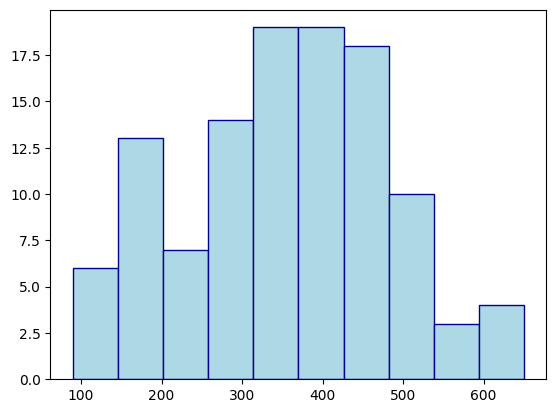

In [33]:
#create a histogram for first column
plt.hist(df_new[' Calories'], bins=10, color="lightblue", ec="darkblue")

(array([ 6.,  5.,  7., 17., 22., 22., 19.,  9.,  4.,  2.]),
 array([ 5. , 12.5, 20. , 27.5, 35. , 42.5, 50. , 57.5, 65. , 72.5, 80. ]),
 <BarContainer object of 10 artists>)

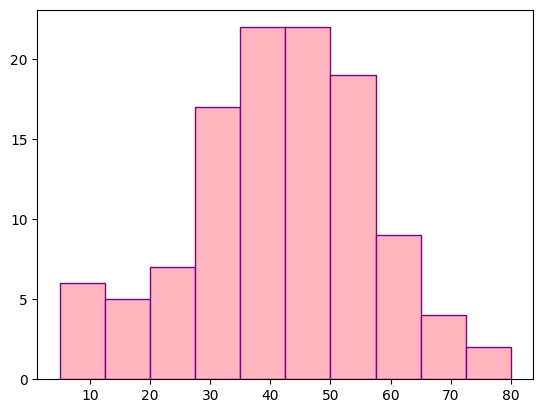

In [34]:
#create a histogram for the second column
plt.hist(df_new['Carbohydrates (g)'], bins=10, color="lightpink", ec="purple")

/var/folders/qw/k7xdr0zs19g8n3n14vm6w1yh0000gn/T/ipykernel_59083/3904158506.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df_new[' Calories'], palette="Pastel2")


<Axes: ylabel=' Calories'>

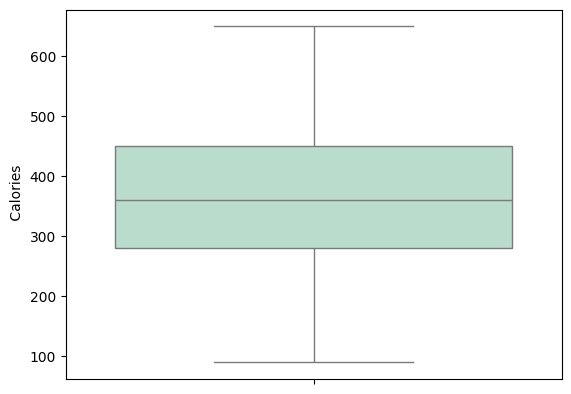

In [35]:
#create a boxplot for first column
sns.boxplot(df_new[' Calories'], palette="Pastel2")

/var/folders/qw/k7xdr0zs19g8n3n14vm6w1yh0000gn/T/ipykernel_59083/3617075879.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df_new['Carbohydrates (g)'], palette="Purples")


<Axes: ylabel='Carbohydrates (g)'>

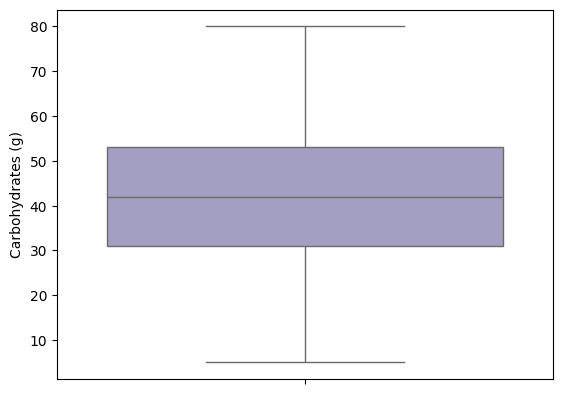

In [37]:
#create a boxplot for first column
sns.boxplot(df_new['Carbohydrates (g)'], palette="Purples")